In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from  tensorflow.keras.utils import to_categorical,plot_model 
import tensorflow as tf
## Sometimes it takes Longer Just to Confirm all is done . 
print("Import Done")

Import Done


In [2]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(xtrain, ytrain),(xtest, ytest) = mnist.load_data() # Load data
## Lets Look at the Shape of Train and Test Dataset 
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


4


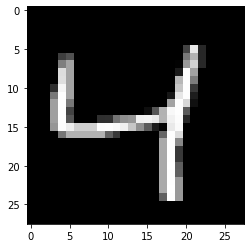

In [3]:
idx=2
plt.imshow(xtrain[idx], cmap="gray") # Import the image
print(ytrain[idx])
plt.show() # Plot the image

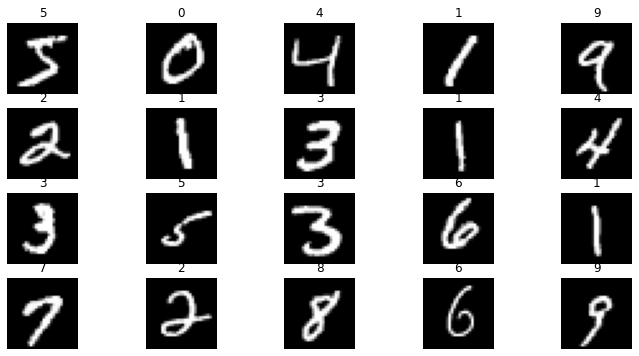

In [4]:
fig,axes= plt.subplots(nrows=4,ncols=5,figsize=(12,6))
axes=axes.flatten()
for i,ax in zip(range(20),axes):
    ax.imshow(xtrain[i],cmap='gray')
    ax.set_title(ytrain[i])
    ax.axis('off')
plt.show()

In [5]:
print(xtrain.shape)
print(xtest.shape)
xtrain=xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# Scaling down Data
xtrain=xtrain/255
xtest=xtest/255

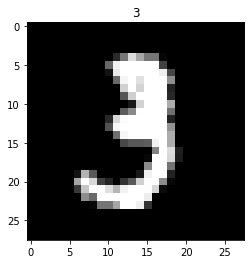

In [7]:
## Idx is just a value can be changed from any value between 0 -59999 there are total 60,000 Image 
idx=10
plt.imshow(xtrain[idx].reshape(28,28), cmap="gray") # Import the image
plt.title(ytrain[idx])  ## Put the Title of the Image . 
plt.show() # Plot the image

In [8]:
# Printing the ytest and ytrain output labels
print(ytest)
print(ytrain)

[7 2 1 ... 4 5 6]
[5 0 4 ... 5 6 8]


In [9]:
## Printing Shape before and After the One Hot Encoding
print(ytrain.shape)
print(ytest.shape)
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [10]:
# Printing the labels for first 10 columns after one hot encoding . 
ytrain[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from tensorflow.keras import models,layers
from keras.layers import Dense, Dropout, Flatten ,BatchNormalization
# Create Sequential Models
model=models.Sequential()
## Add the Layers for Convocalation 
model.add(layers.Conv2D(filters=10,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.10))
## Add Second Conventional Layer to Model
model.add(layers.Conv2D(filters=12,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.10))
model.add(layers.Conv2D(filters=20,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.10))
## Adding Max Pooling Layer


## Flattne Layer
model.add(layers.Flatten())
#model.add(Dropout(0.10))
### Classification Segemention to the  
model.add(layers.Dense(150,activation='relu'))
#model.add(Dropout(0.10))
model.add(layers.Dense(100,activation='relu'))
#model.add(Dropout(0.10))
model.add(layers.Dense(50,activation='relu'))
#model.add(Dropout(0.10))
########Output layer for 
model.add(layers.Dense(10,activation='softmax'))

In [13]:
## Printing the Summary of Model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        492       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 20)          980       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 20)         0

In [14]:
# Model Compilation

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        492       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 20)          980       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 20)         0

In [15]:
# Here we are fitting 
history=model.fit(xtrain, ytrain, epochs=22,batch_size=1000,verbose=True,validation_data=(xtest, ytest))

Epoch 1/22
60/60 [==============================] - 8s 105ms/step - loss: 1.5974 - accuracy: 0.5289 - val_loss: 0.7481 - val_accuracy: 0.7559
Epoch 2/22
60/60 [==============================] - 5s 90ms/step - loss: 0.5253 - accuracy: 0.8371 - val_loss: 0.3652 - val_accuracy: 0.8860
Epoch 3/22
60/60 [==============================] - 5s 92ms/step - loss: 0.3228 - accuracy: 0.9003 - val_loss: 0.2540 - val_accuracy: 0.9213
Epoch 4/22
60/60 [==============================] - 6s 95ms/step - loss: 0.2395 - accuracy: 0.9255 - val_loss: 0.1980 - val_accuracy: 0.9393
Epoch 5/22
60/60 [==============================] - 6s 92ms/step - loss: 0.1994 - accuracy: 0.9371 - val_loss: 0.1796 - val_accuracy: 0.9453
Epoch 6/22
60/60 [==============================] - 6s 96ms/step - loss: 0.1758 - accuracy: 0.9452 - val_loss: 0.1591 - val_accuracy: 0.9510
Epoch 7/22
60/60 [==============================] - 6s 95ms/step - loss: 0.1577 - accuracy: 0.9499 - val_loss: 0.1445 - val_accuracy: 0.9558
Epoch 8/22
6

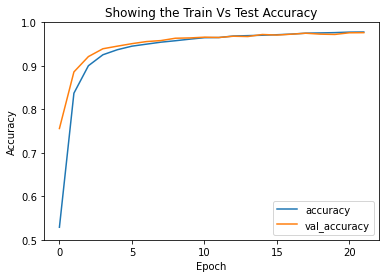

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title("Showing the Train Vs Test Accuracy")
plt.legend(loc='lower right')

In [ ]:
## Classification Report
from sklearn.metrics import classification_report
y_pred= model.predict_classes(xtest)
y_pred2=to_categorical(y_pred)

print(classification_report(ytest,y_pred2))